In [2]:
import random
import tensorflow as tf

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [1]:
#CASIA_B
def create_record(records_path, data_path):
   
    writer = tf.io.TFRecordWriter(records_path)
      
    
    img_list = []
    dataType = {'float': [4, tf.float32]}
    
  
    subjects = os.listdir(data_path)[74:]
    variations = os.listdir(data_path +'/'+ subjects[0])
    angles = os.listdir(data_path +'\\'+ subjects[0] + '\\' + variations[0])
    PEI_image = []
    for sub in subjects:
        sub_dir = f'{data_path}\\{sub}'      
        for var in variations:
            var_dir = f'{sub_dir}\\{var}'    
            for ang in angles:
                ang_dir = f'{var_dir}\\{ang}'
                images_dir = f'{data_path}\\{sub}\\{var}\\{ang}'
                images_filename = os.listdir(images_dir)
                if not images_filename:
                    continue
                for f in images_filename:
                    img_path = images_dir+'/'+ f
                    pei_info = {
                        'subject': float(sub),
                        'variation': var,
                        'angle': float(ang),
                        'image_path': img_path
                    }
                    PEI_image.append(pei_info)

    print('Load data finished.')
    cnt = 0
    for data in PEI_image:
        
        data_raw = cv2.imread(data['image_path'], -1).tobytes()
        example = tf.train.Example(
           features=tf.train.Features(feature={
                "subject": tf.train.Feature(float_list=tf.train.FloatList(value=[data['subject']])),
#                 "variation": tf.train.Feature(float_list=tf.train.FloatList(value=[data['variation']])),
                "angle": tf.train.Feature(float_list=tf.train.FloatList(value=[data['angle']])),
                'data_raw': tf.train.Feature(bytes_list=tf.train.BytesList(value=[data_raw]))
           }))
        
        writer.write(example.SerializeToString())
  
        cnt += 1
        if cnt%100 == 0:
            print(f'Finished {cnt} data.')

    writer.close()

In [110]:
create_record(r'C:\Users\User\Desktop\Aaron\College-level Applied Research\PEI_tfrecord\pei_test_50.tfrecords',
              r'C:\Users\User\Desktop\Aaron\College-level Applied Research\PEI_output')

Load data finished.
79.0
bg-01
54.0
(4, 1)
79.0
bg-01
54.0
(4, 1)
79.0
bg-02
18.0
(4, 1)
81.0
cl-02
0.0
(4, 1)
81.0
cl-02
0.0
(4, 1)
88.0
nm-02
18.0
(4, 1)
88.0
nm-02
18.0
(4, 1)
88.0
nm-02
18.0
(4, 1)
88.0
nm-02
18.0
(4, 1)
88.0
nm-02
18.0
(4, 1)
88.0
nm-02
36.0
(4, 1)
88.0
nm-02
54.0
(4, 1)
88.0
nm-02
54.0
(4, 1)
88.0
nm-02
54.0
(4, 1)
88.0
nm-03
18.0
(4, 1)
88.0
nm-03
18.0
(4, 1)
88.0
nm-03
36.0
(4, 1)
88.0
nm-04
18.0
(4, 1)
88.0
nm-04
18.0
(4, 1)
88.0
nm-04
18.0
(4, 1)
88.0
nm-04
18.0
(4, 1)
88.0
nm-04
18.0
(4, 1)
88.0
nm-04
144.0
(4, 1)
88.0
nm-04
144.0
(4, 1)
88.0
nm-04
144.0
(4, 1)
88.0
nm-04
144.0
(4, 1)
88.0
nm-04
144.0
(4, 1)
94.0
bg-02
0.0
(4, 1)
96.0
nm-01
72.0
(4, 1)
96.0
nm-02
72.0
(4, 1)
96.0
nm-03
18.0
(4, 1)
96.0
nm-03
18.0
(4, 1)
96.0
nm-03
18.0
(4, 1)
96.0
nm-03
18.0
(4, 1)
96.0
nm-03
18.0
(4, 1)
96.0
nm-03
54.0
(4, 1)
96.0
nm-03
54.0
(4, 1)
96.0
nm-03
54.0
(4, 1)
96.0
nm-03
54.0
(4, 1)
96.0
nm-03
180.0
(4, 1)
96.0
nm-06
72.0
(4, 1)
98.0
cl-01
0.0
(4, 1)
98.0
cl-01
0

NameError: name 'writer' is not defined

In [99]:
def readTFRECORD():
    AUTOTUNE = tf.data.experimental.AUTOTUNE
    data_set = tf.data.TFRecordDataset(r'C:\Users\User\Desktop\Aaron\College-level Applied Research\PEI_tfrecord\pei_test_50.tfrecords')
    data_set = data_set.map(parse, num_parallel_calls=AUTOTUNE)

    data_set = data_set.shuffle(
        100, reshuffle_each_iteration=True)
    data_batch = data_set.batch(64, drop_remainder=True)
    data_batch = data_batch.prefetch(buffer_size=AUTOTUNE)
    return data_batch
def parse(example_proto):

        features = tf.io.parse_single_example(
            example_proto,
            features={
                'angle': tf.io.FixedLenFeature([], tf.float32),
                'subject': tf.io.FixedLenFeature([], tf.float32),
                'data_raw': tf.io.FixedLenFeature([], tf.string),
            }
            
        )
        data = features['data_raw']
     
        data = tf.io.decode_raw(data, tf.uint8)
#      
        data = tf.reshape(data, [64, 64])
        
        return [features['angle'], features['subject'], data]

In [100]:
batch = readTFRECORD()

In [16]:
sequence = '00'
angles = [i for i in range(0, 271, 15)]
subjects = [i for i in range(1, 10308)]
path = r'F:\OU_MVLP\GEI'


cnt = 0
for sub in subjects:
    PPL = OU_MVLP_PPL(sequence, 1, angles)
    PPL.load_gait_image(path)
    print(type(PPL.subject_gait_dict['000'][0, 0, 0]))
    break

<class 'numpy.float32'>


In [8]:
[i for i in range(0, 91, 15)] + [i for i in range(180, 271, 15)]

[0, 15, 30, 45, 60, 75, 90, 180, 195, 210, 225, 240, 255, 270]

In [3]:
# OU_MVLP

class OU_MVLP_PPL():
    def __init__(self, sequence: str, subject: str, angles_idx: list):
        '''  
        keywargs:
            sequence: '00' or '01',
            subject: a string. ID of a person.
            angles_idx: a list with int. The angle is start from 0 and end at 270. 15 per step.    
        '''
        
        self.subject = str(subject).zfill(5)
        self.sequence = sequence
        self.angle_folder_name = [f'{str(i).zfill(3)}-{sequence}' for i in angles_idx]
        
#         self.subject_gait_dict = {str(ang).zfill(3):None for ang in angles_idx}
        self.subject_gait_dict = {}
    def load_gait_image(self, path):
        for ang in self.angle_folder_name:
           
            image = cv2.imread(f'{path}/{ang}/{self.subject}.png')
            if image is not None:
                self.subject_gait_dict[ang[:3]] = image.astype(np.float32)
                
def create_record(records_path, data_path):
   
    writer = tf.io.TFRecordWriter(records_path)
      
    sequence = '00'
    angles = [i for i in range(0, 91, 15)] + [i for i in range(180, 271, 15)]
    subjects = [i for i in range(1, 10308)]
    path = data_path
    
    

    cnt = 0
    for sub in subjects:
        PPL = OU_MVLP_PPL(sequence, 1, angles)
        PPL.load_gait_image(path)
        PPL_gaits_img = np.array([img for ang, img in PPL.subject_gait_dict.items()]).tobytes()
        PPL_angle = np.array([int(ang) for ang, img in PPL.subject_gait_dict.items()]).tobytes()
        example = tf.train.Example(
           features=tf.train.Features(feature={
                "subject": tf.train.Feature(float_list=tf.train.FloatList(value=[sub])),
                "angles": tf.train.Feature(bytes_list=tf.train.BytesList(value=[PPL_angle])),
                'images': tf.train.Feature(bytes_list=tf.train.BytesList(value=[PPL_gaits_img]))
           }))
        
        writer.write(example.SerializeToString())
  
        cnt += 1
        if cnt%100 == 0:
            print(f'Finished {cnt} data.')

    writer.close()

In [5]:
create_record(r'C:\Users\andy1\Desktop\650S100\College-level Applied Research\gait_recognition\OU_MVLP_GEI_TFRECORD\GEI_00_float32.tfrecords',
              r'C:\Users\andy1\Desktop\GEI')

Finished 100 data.
Finished 200 data.
Finished 300 data.
Finished 400 data.
Finished 500 data.
Finished 600 data.
Finished 700 data.
Finished 800 data.
Finished 900 data.
Finished 1000 data.
Finished 1100 data.
Finished 1200 data.
Finished 1300 data.
Finished 1400 data.
Finished 1500 data.
Finished 1600 data.
Finished 1700 data.
Finished 1800 data.
Finished 1900 data.
Finished 2000 data.
Finished 2100 data.
Finished 2200 data.
Finished 2300 data.
Finished 2400 data.
Finished 2500 data.
Finished 2600 data.
Finished 2700 data.
Finished 2800 data.
Finished 2900 data.
Finished 3000 data.
Finished 3100 data.
Finished 3200 data.
Finished 3300 data.
Finished 3400 data.
Finished 3500 data.
Finished 3600 data.
Finished 3700 data.
Finished 3800 data.
Finished 3900 data.
Finished 4000 data.
Finished 4100 data.
Finished 4200 data.
Finished 4300 data.
Finished 4400 data.
Finished 4500 data.
Finished 4600 data.
Finished 4700 data.
Finished 4800 data.
Finished 4900 data.
Finished 5000 data.
Finished 

In [6]:
def readTFRECORD():
    AUTOTUNE = tf.data.experimental.AUTOTUNE
    data_set = tf.data.TFRecordDataset(r'C:\Users\andy1\Desktop\650S100\College-level Applied Research\gait_recognition\OU_MVLP_GEI_TFRECORD\GEI_00_float32.tfrecords')
    data_set = data_set.map(parse, num_parallel_calls=AUTOTUNE)

    data_set = data_set.shuffle(
        64, reshuffle_each_iteration=True)
    data_batch = data_set.batch(64, drop_remainder=True)
    data_batch = data_batch.prefetch(buffer_size=AUTOTUNE)
    return data_batch
def parse(example_proto):

        features = tf.io.parse_single_example(
            example_proto,
            features={
                'subject': tf.io.FixedLenFeature([], tf.float32),
                'angles': tf.io.FixedLenFeature([], tf.string),
                'images': tf.io.FixedLenFeature([], tf.string),
            }
            
        )
        images = features['images']
        angles = features['angles']
        angles = tf.io.decode_raw(angles, np.int32)
        images = tf.io.decode_raw(images, np.float32)
        
        random_angle = tf.random.shuffle(range(tf.shape(angles)[0]))[:2]
        
        onehot_list = tf.one_hot(tf.range(tf.shape(angles)[0]),tf.shape(angles)[0])
        
        angle_onehot = onehot_list[random_angle[0]]+onehot_list[random_angle[1]]
        ang1_idx = random_angle[0]
        ang2_idx = random_angle[1]
      
        images = tf.reshape(images, [tf.shape(angles)[0], 128, 88, 3])

        random_select_image_1 = tf.image.resize(tf.image.rgb_to_grayscale(images[ang1_idx]), [
                                                64, 64])
        random_select_image_2 = tf.image.resize(tf.image.rgb_to_grayscale(images[ang2_idx]), [
                                                64, 64])
        
#         images = tf.reshape(images, [tf.shape(angles)[0], 128, 88, 3])
        
        return [features['subject'], angle_onehot, random_select_image_1, random_select_image_2]

In [20]:
batch = readTFRECORD()

-1.0
0.99980015


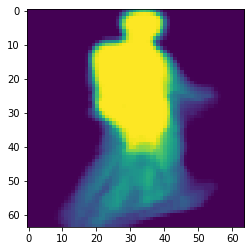

In [26]:
for i in batch:
    plt.imshow(i[3][50])
    
    print(np.min((i[3][50]-127.5)/127.5))
    print(np.max((i[3][50]-127.5)/127.5))
    break

In [65]:
class OU_MVLP_GEI():
    def __init__(self, sequence: str, subject_ids: list, angles_ids:list):
        '''
        
        keywargs:
            sequence: '00' or '01',
            subject_ids: a list with int. The id of each ppl.
            angles_ids: a list with int. The angle is start from 0 and end at 270. 15 per step. 
            
        '''
        
        self.GEI_subjects = {sub: OU_MVLP_PPL(sequence, sub, angles_ids).load_gait_image('F:\OU_MVLP\GEI') for sub in subject_ids}
        

In [5]:
sequence = '00'
angles = [i for i in range(0, 271, 15)]
subjects = [i for i in range(1, 10308)]
path = r'F:\OU_MVLP\GEI'

PPL = OU_MVLP_PPL(sequence, 1, angles)
PPL.load_gait_image(path)

In [6]:
for key, value in PPL.subject_gait_dict.items():
    print(float(key))

0.0
15.0
30.0
45.0
60.0
75.0
90.0
180.0
195.0
210.0
225.0
240.0
255.0
270.0


In [29]:
sequence = '00'
angles = [f'{str(i).zfill(3)}-{sequence}' for i in range(0, 271, 15)]
subjects = [i for i in range(1, 10308)]
path = '/Users/lance/Desktop/650S100/gait/OU_MLVP/__Parent__/__Parent__/GEI'

def build_OU_MVLP_object(sequence, subjects, angles_ids, path):
    for sub in subjects:
        PPL = OU_MVLP_PPL(sequence, sub, angles_ids)
        yield  PPL.load_gait_image(path)
    
PPL_gait_dict = read_OU_MVLP 
for ang in angles:
    img_folder_dir = f'{path}/{ang}'
    img_names = os.listdir(img_folder_dir)
    for name in img_names:
        # remove file extension
        sub = os.path.splitext(name)[0]
        subjects[sub] = cv2.imread(f'{img_folder_dir}/{name}')
    break

In [24]:
a= cv2.imread(r'F:\OU_MVLP\GEI\000-00/00001.png')

In [30]:
a = a.astype(np.float32)

In [31]:
tf.image.rgb_to_grayscale(a)

<tf.Tensor: shape=(128, 88, 1), dtype=float32, numpy=
array([[[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       ...,

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]], dtype=float32)>

In [26]:
tf.image.resize(a, [64, 64])

<tf.Tensor: shape=(64, 64, 3), dtype=float32, numpy=
array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)>

In [3]:
OU_MVLP_train = {

    "feature": {
        "subject": tf.float32,
        "angles":  tf.string,
        "images": tf.string
    }
}

In [9]:
features={featur: tf.io.FixedLenFeature([], OU_MVLP_train['feature'][featur]) for featur in OU_MVLP_train['feature']}

In [10]:
features

{'subject': FixedLenFeature(shape=[], dtype=tf.float32, default_value=None),
 'angles': FixedLenFeature(shape=[], dtype=tf.string, default_value=None),
 'images': FixedLenFeature(shape=[], dtype=tf.string, default_value=None)}